## Siyu Yang CPA01
- The dataset was retrieved from OECD. 
- This dataset contains the labor force participation rate of both men and women(in % of female population ages 15-64) in each country from year 2010 - 2020. 
- The original URL: https://data.oecd.org/emp/labour-force-participation-rate.htm with the available csv file download option.
<br>
- The two main questions to answer and analyze are:
    1. Does Covid has an effect on women's labor force participation rate? on men's ?(and possible reasons)
    2. What is the average growth rate of each years's LFPR in the world, what is the general trend in the past 10 years ?


In [1]:
# pylint: disable=missing-module-docstring
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
#first we import the required packages panda and numpy


### 1. First, we read the data and skim through it
At the first glance, there are total of 89868 of data, including each country's male LFPR, female LFPR and LFPR of all persons in different time range from 2010 to 2020.
There are also 89863 of labor force participation rate value with the minimum of 0 and maximum 0f 98.02. The existence of 0.00000 is likely that the corrsponding data is missing from the dataset, so we will remove the rows of data has Value = 0.0000000 for a more accurate analysis. 

In [10]:
df = pd.read_csv('LFS_SEXAGE.csv')# read the data

df =df[df['Value'] !=0] #clean missing data rows 
df.describe() #a quick look at the data


,AGE,TIME,Time,PowerCode Code,Reference Period Code,Reference Period,Value,Flag Codes,Flags
count,87807.000000,87807.000000,87807.000000,87807.0,0.0,0.0,87807.000000,0.0,0.0
mean,43453.355758,2015.004043,2015.004043,0.0,NaN,NaN,43.035021,NaN,NaN
std,183706.680678,3.159787,3.159787,0.0,NaN,NaN,34.251475,NaN,NaN
min,1519.000000,2010.000000,2010.000000,0.0,NaN,NaN,0.016031,NaN,NaN
25%,2534.000000,2012.000000,2012.000000,0.0,NaN,NaN,6.827240,NaN,NaN
50%,4044.000000,2015.000000,2015.000000,0.0,NaN,NaN,42.808499,NaN,NaN
75%,6064.000000,2018.000000,2018.000000,0.0,NaN,NaN,77.943267,NaN,NaN
max,900000.000000,2020.000000,2020.000000,0.0,NaN,NaN,98.021452,NaN,NaN


### 2. Then we create a pivot table to see some numbers of each country's female LFPR from 2010 - 2020;

In [4]:
df2=df[df['Sex']=='Women'] #we are only looking at women's LFPR
column = 'Value'

df2 = pd.pivot_table(df2, values=column, index=["Time"], columns=["Country"])
df2

Country,Australia,Austria,Belgium,Canada,Chile,Colombia,Costa Rica,Czech Republic,Denmark,Estonia,...,Poland,Portugal,Slovak Republic,Slovenia,Spain,Sweden,Switzerland,Turkey,United Kingdom,United States
Time,,,,,,,,,,,,,,,,,,,,,
2010,41.159999,39.079950,35.346458,43.185245,30.640818,35.845899,31.306341,35.923173,46.515821,44.141426,...,35.061002,41.751882,37.081113,38.879903,38.526799,45.885964,42.137877,20.026233,41.703306,40.246751
2011,41.433906,38.840889,34.665420,42.711667,31.851662,36.337784,30.672345,36.098964,46.578423,43.751350,...,35.347591,41.034332,36.770576,38.579118,39.333719,46.754144,42.041314,20.619997,40.738746,39.982674
2012,41.496600,39.865873,35.822810,42.816289,32.527339,37.129491,33.420089,37.159318,46.518486,43.311976,...,35.796052,41.611427,37.124484,38.884641,40.355217,46.474629,42.288044,21.004652,41.084981,39.853921
2013,41.567522,39.643921,35.035060,43.014641,32.755840,36.975726,33.591191,37.862152,45.663080,43.880470,...,35.967296,41.496240,37.413780,38.871988,40.811846,46.781257,43.203844,21.977471,41.443502,38.146211
2014,41.727728,39.722505,35.413161,43.361420,33.273218,37.041499,33.364707,37.662957,45.308834,43.042480,...,36.131188,41.313429,38.045731,39.409219,40.748157,47.115450,43.157462,20.801993,41.632898,38.027421
2015,42.124246,39.836262,35.748795,42.845451,32.832090,37.520752,32.437471,37.275566,45.219314,43.527372,...,34.901591,41.531733,38.494263,39.303193,40.689656,47.262006,43.536491,22.070479,41.812850,37.803344
2016,42.386167,40.319988,35.245218,42.998921,33.479306,37.508958,30.594391,37.543838,45.906846,44.462771,...,34.871912,41.276630,38.195645,39.416701,40.677668,47.364435,43.970757,22.828049,41.899788,38.007214
2017,42.854738,40.923583,36.798539,43.336080,33.520797,37.889514,31.325113,37.825914,46.108978,44.540756,...,34.882605,41.684225,38.570266,40.769560,40.252448,47.678118,43.887890,23.652084,42.317583,38.261422
2018,43.388129,41.053722,36.209692,43.335956,33.979664,37.139740,32.869588,38.117555,46.150635,45.050597,...,35.399489,42.008793,38.159873,40.833232,40.002681,47.846741,44.854963,24.140382,43.108403,38.362008


### 3. Then we'll pick four examples and plot them to see a general trend among women's LFPR
 - We can see that about the year 2019 to 2020, there are a different change of slope of each curve, but the all of them experienced an decrease of the slope (or a slowed rate of growth) to some extend.

Text(0.5, 1.0, '% of US, Australia, Japan and France women Labor Force Participation rate in year 2010 - 2020')

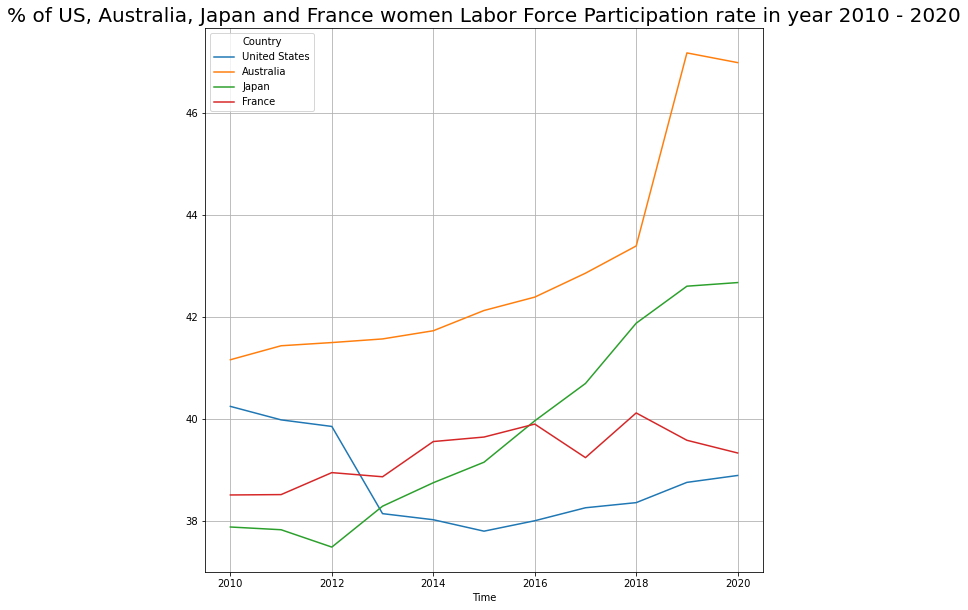

In [5]:

df2[['United States','Australia','Japan','France']].plot(figsize=(10,10)) 
#US as in North america, Austrilia as in Oceania, Japan as in Asia, Germany as in Europe for four main continents as examples
plt.grid()
plt.title('% of US, Australia, Japan and France women Labor Force Participation rate in year 2010 - 2020',fontsize=20)


### 4. Navigating the relationship between COVID and labor force participation rate
 - From the plots and tables below, we see that both women and men(in the All gender plot) experienced a decrease of labor force participation rate. Some are shown by a decreased rate of growth(that the rate was growthing but with a slower pace), and some are shown by a direct downward broken line.


In [6]:
df3=df[df['SEX']=='MW'] #we are looking at all gender's LFPR
column = 'Value'
df3 = pd.pivot_table(df3, values=column, index=["Time"], columns=["Country"])
df3


Country,Australia,Austria,Belgium,Canada,Chile,Colombia,Costa Rica,Czech Republic,Denmark,Estonia,...,Poland,Portugal,Slovak Republic,Slovenia,Spain,Sweden,Switzerland,Turkey,United Kingdom,United States
Time,,,,,,,,,,,,,,,,,,,,,
2010,45.317689,41.704323,38.451347,45.232148,38.855314,43.660227,40.262370,40.233148,49.037057,46.085831,...,38.592755,44.345410,40.142126,41.424765,42.317098,47.980034,44.507112,31.811591,44.409059,43.714934
2011,45.451649,41.865710,37.748626,44.651576,39.721240,44.045326,39.473946,40.262117,48.264445,45.682286,...,38.856394,43.839734,40.589912,40.861142,42.657372,47.904443,45.559690,31.806468,44.517500,43.430359
2012,45.435010,42.195833,37.457484,45.382387,39.741999,44.527922,42.073267,40.794390,47.996659,45.474706,...,39.283706,44.143253,40.909337,40.912147,43.266234,48.224542,45.710706,31.839647,44.783790,43.334068
2013,45.443999,42.444858,37.923234,44.902766,39.851552,44.322573,41.767390,41.214304,47.607176,45.298146,...,39.463398,43.829294,41.084618,41.010820,43.482100,48.498488,45.833530,32.860898,45.068710,41.596937
2014,45.470714,42.420304,38.007405,44.746535,40.079946,44.336684,41.488459,41.769773,47.627393,45.039032,...,39.684786,43.614645,41.717831,41.440025,43.311778,48.814358,46.178702,32.903947,45.051742,41.373729
2015,45.766656,42.530611,37.950071,44.899843,40.109621,44.615048,40.793109,41.201924,47.759378,45.716605,...,38.451836,43.605891,41.146980,41.390169,43.250641,48.772004,45.821001,33.097873,45.206674,41.234513
2016,45.798083,42.977073,37.888622,45.003216,40.199071,44.554158,39.260704,41.464692,48.111561,46.349056,...,38.569662,43.520310,41.309129,41.031547,43.088848,48.834818,46.825970,33.656480,45.226610,41.425871
2017,46.122479,43.042272,37.989930,45.227823,40.525998,44.428930,39.846892,41.727483,48.328058,46.954035,...,38.655368,43.886189,41.235758,42.437440,42.755290,49.155380,46.839525,34.241135,45.479195,41.557451
2018,46.531712,43.897834,38.161046,45.144443,40.621450,44.212657,41.300067,41.987029,48.495383,47.278343,...,38.683569,44.005834,41.042656,42.798039,42.568503,49.254334,46.980402,34.588937,45.536538,41.684672


Text(0.5, 1.0, '% of US, Australia, Japan and France All gender Labor Force Participation rate in year 2010 - 2020')

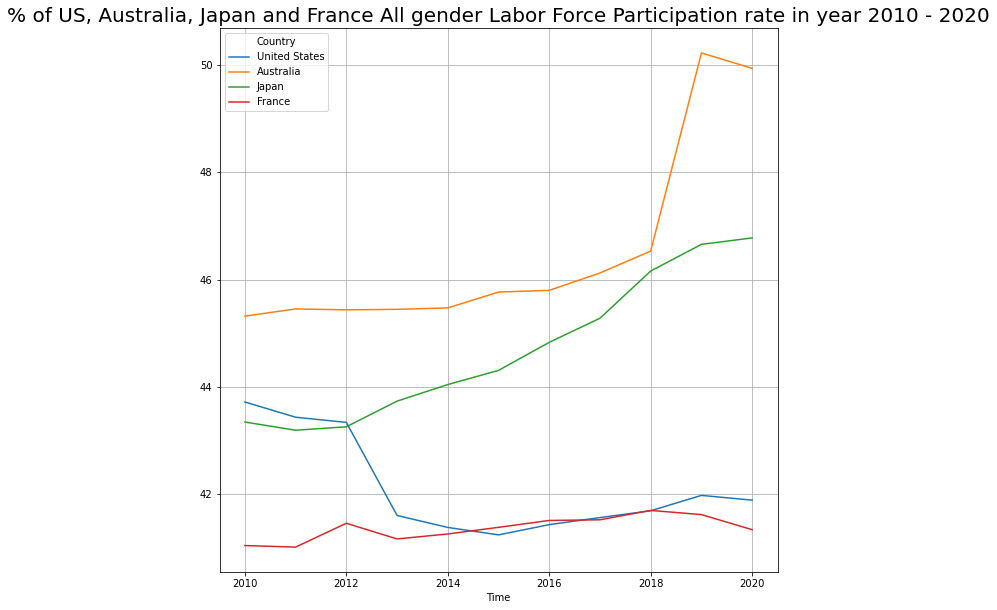

In [7]:
df3[['United States','Australia','Japan','France']].plot(figsize=(10,10)) 
#US as in North america, Austrilia as in Oceania, Japan as in Asia, Germany as in Europe for four main continents as examples
plt.grid()
plt.title('% of US, Australia, Japan and France All gender Labor Force Participation rate in year 2010 - 2020' ,fontsize=20)

### 5. Navigating growth rate of and general trend in the past 10 years
- First we'll creat an empty data frame by each country, and calculate each year's growth rate and fill them in.

In [29]:
countries = pd.unique(df["Country"])

DF = pd.DataFrame(columns = countries)  # create an empty dataframe by each country 
DF


,Australia,Austria,Belgium,Canada,Czech Republic,Denmark,Finland,France,Germany,Greece,...,United States,OECD countries,Israel,Chile,Slovenia,Estonia,Lithuania,Latvia,Colombia,Costa Rica
